In [186]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [187]:
df=pd.read_csv('https://raw.githubusercontent.com/upflairs-pvt-ltd/JECRC-20april2024/main/farmer.csv')
df.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [188]:
df['label'].value_counts()

label
rice           100
maize          100
jute           100
cotton         100
coconut        100
papaya         100
orange         100
apple          100
muskmelon      100
watermelon     100
grapes         100
mango          100
banana         100
pomegranate    100
lentil         100
blackgram      100
mungbean       100
mothbeans      100
pigeonpeas     100
kidneybeans    100
chickpea       100
coffee         100
Name: count, dtype: int64

In [189]:
df.shape

(2200, 8)

In [190]:
df['label'].nunique()

22

In [191]:
rice=df[df['label']=='rice']
rice.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [192]:
coconut=df[df['label']=='coconut']
coconut.head()

,N,P,K,temperature,humidity,ph,rainfall,label
1800,18,30,29,26.762749,92.860569,6.420019,224.590366,coconut
1801,37,23,28,25.612944,94.313884,5.740055,224.320676,coconut
1802,13,28,33,28.130115,95.648076,5.686973,151.076190,coconut
1803,2,21,35,25.028872,91.537209,6.293662,179.824894,coconut
1804,10,18,35,27.797977,99.645730,6.381975,181.694228,coconut


In [193]:
rice['N'].mean()

79.89

In [194]:
coconut['N'].mean()

21.98

In [195]:
rice['temperature'].mean()

23.6893322105

In [196]:
coconut['temperature'].mean()

27.409892172299998

In [197]:
grouped=df.groupby('label')

In [198]:
grouped[['temperature']].mean()

,temperature
label,
apple,22.630942
banana,27.376798
blackgram,29.973340
chickpea,18.872847
coconut,27.409892
coffee,25.540477
cotton,23.988958
grapes,23.849575
jute,24.958376


In [199]:
grouped[['N']].mean()

,N
label,
apple,20.80
banana,100.23
blackgram,40.02
chickpea,40.09
coconut,21.98
coffee,101.20
cotton,117.77
grapes,23.18
jute,78.40


In [200]:
group=grouped['temperature'].agg(min="min",max="max",mean="mean").reset_index()

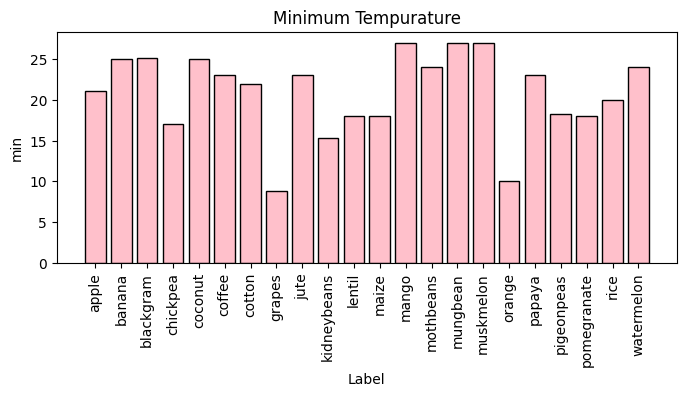

In [201]:
x=list(group['label'])
y=list(group['min'])
plt.figure(figsize=(8,3))
plt.bar(x,y,ec='k',color='pink')
plt.title('Minimum Tempurature')
plt.xlabel('Label')
plt.ylabel('min')
plt.xticks(rotation=90)
plt.show()


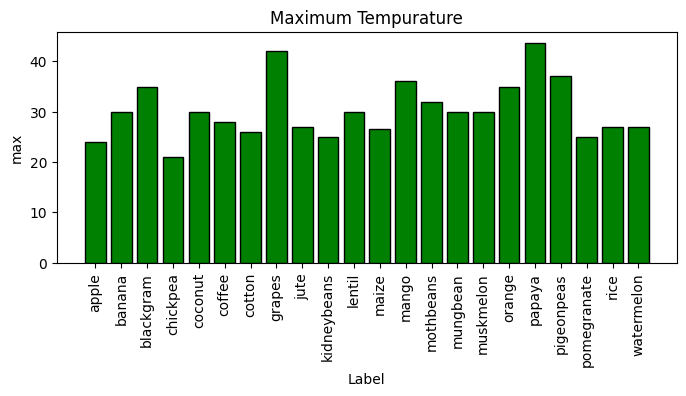

In [202]:
x=list(group['label'])
y=list(group['max'])
plt.figure(figsize=(8,3))
plt.bar(x,y,ec='k',color='green')
plt.title('Maximum Tempurature')
plt.xlabel('Label')
plt.ylabel('max')
plt.xticks(rotation=90)
plt.show()


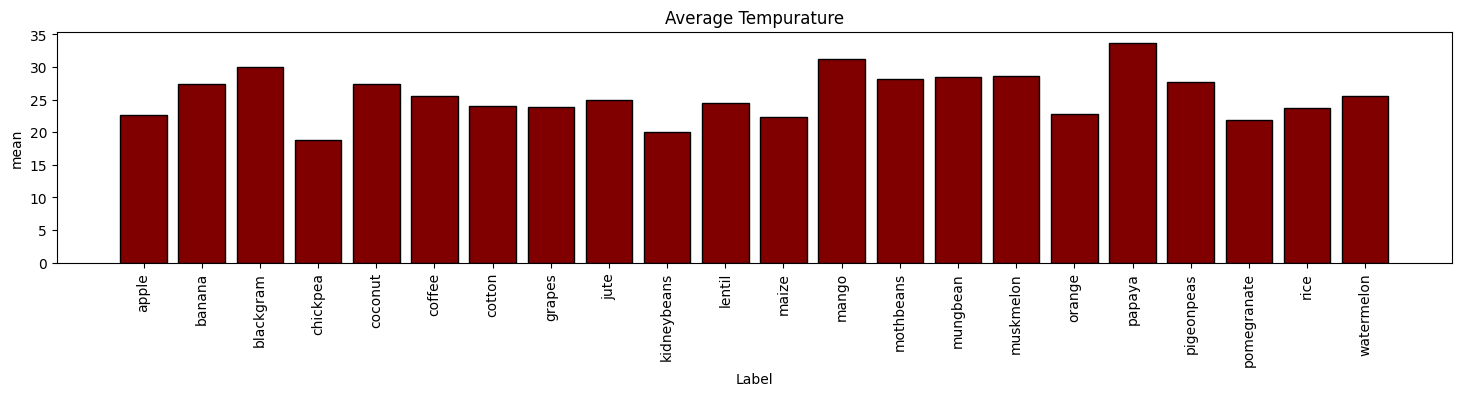

In [203]:
x=list(group['label'])
y=list(group['mean'])
plt.figure(figsize=(18,3))
plt.bar(x,y,ec='k',color='maroon')
plt.title('Average Tempurature')
plt.xlabel('Label')
plt.ylabel('mean')
plt.xticks(rotation=90)
plt.show()


In [204]:
x=df.drop('label',axis='columns')
x.head()

,N,P,K,temperature,humidity,ph,rainfall
0,90,42,43,20.879744,82.002744,6.502985,202.935536
1,85,58,41,21.770462,80.319644,7.038096,226.655537
2,60,55,44,23.004459,82.320763,7.840207,263.964248
3,74,35,40,26.491096,80.158363,6.980401,242.864034
4,78,42,42,20.130175,81.604873,7.628473,262.717340


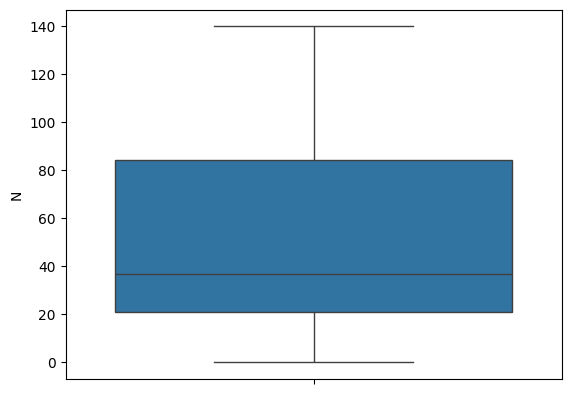

In [205]:
sns.boxplot(df['N'])
plt.show()

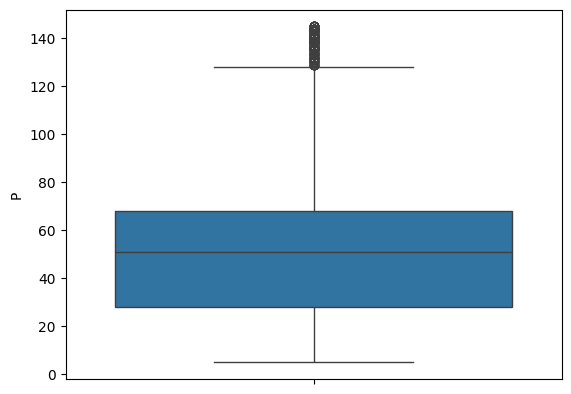

In [206]:
sns.boxplot(df['P'])
plt.show()

In [207]:
#Domain Knowledge


Normalize

In [208]:
import warnings
warnings.filterwarnings('ignore')

In [209]:
# sns.distplot(df['P'])
# plt.show()


In [210]:
## to normalize the outliers
from sklearn.preprocessing import StandardScaler,MinMaxScaler
std=StandardScaler()
x_transformed=std.fit_transform(x)#data transformation

In [211]:
x_transformed #mean=0 median=1

array([[ 1.0687974 , -0.34455075, -0.1016875 , ...,  0.47266646,
         0.04330173,  1.8103605 ],
       [ 0.93332887,  0.14061552, -0.14118477, ...,  0.39705125,
         0.73487256,  2.24205791],
       [ 0.25598625,  0.04964684, -0.08193887, ...,  0.48695381,
         1.77151047,  2.92106603],
       ...,
       [ 1.82742114, -0.61745677, -0.35841972, ..., -0.19123516,
        -0.13812031,  1.27141766],
       [ 1.80032743, -0.64777967, -0.27942519, ..., -0.86951801,
         0.37390383,  0.43154519],
       [ 1.44810927, -1.07230015, -0.35841972, ..., -0.49802006,
         0.40109573,  0.68200518]])

In [212]:
print("Total number of clay samples:",x_transformed.shape[0])

Total number of clay samples: 2200


Training and Testing Spliting

In [213]:
train=x_transformed[:2100]# no y vairiable so no train_test_split
test=x_transformed[2100:]

In [214]:
# unsupervised k-means(on basis of similarity)
from sklearn.cluster import KMeans
obj=KMeans() #n_clusters by default 8

In [215]:
#algorithms fitted on training data
obj.fit(train)

KMeans()

In [216]:
clust=obj.labels_ #numbers between 0 and 7 i.e 8 groups

In [217]:
pd.DataFrame(train)

,0,1,2,3,4,5,6
0,1.068797,-0.344551,-0.101688,-0.935587,0.472666,0.043302,1.810361
1,0.933329,0.140616,-0.141185,-0.759646,0.397051,0.734873,2.242058
2,0.255986,0.049647,-0.081939,-0.515898,0.486954,1.771510,2.921066
3,0.635298,-0.556811,-0.160933,0.172807,0.389805,0.660308,2.537048
4,0.743673,-0.344551,-0.121436,-1.083647,0.454792,1.497868,2.898373
...,...,...,...,...,...,...,...
2095,0.987516,-0.283905,-0.101688,-0.343973,0.687857,0.322121,1.347709
2096,1.014610,-0.041322,-0.180682,-0.333300,0.745295,0.530815,0.931775
2097,1.068797,-0.435519,-0.220179,-0.158383,0.458476,0.506085,1.589290
2098,1.068797,-0.435519,-0.101688,-0.230870,0.485414,0.387542,1.592564


In [218]:
testing_df=x[:2100]

In [219]:
testing_df['cluster']=clust

In [220]:
testing_df

,N,P,K,temperature,humidity,ph,rainfall,cluster
0,90,42,43,20.879744,82.002744,6.502985,202.935536,4
1,85,58,41,21.770462,80.319644,7.038096,226.655537,4
2,60,55,44,23.004459,82.320763,7.840207,263.964248,4
3,74,35,40,26.491096,80.158363,6.980401,242.864034,4
4,78,42,42,20.130175,81.604873,7.628473,262.717340,4
...,...,...,...,...,...,...,...,...
2095,87,44,43,23.874845,86.792613,6.718725,177.514731,4
2096,88,52,39,23.928879,88.071123,6.880205,154.660874,4
2097,90,39,37,24.814412,81.686889,6.861069,190.788639,4
2098,90,39,43,24.447439,82.286484,6.769346,190.968489,4


In [221]:
testing_df['Label']=df[:2100]['label']

In [222]:
testing_df

,N,P,K,temperature,humidity,ph,rainfall,cluster,Label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,4,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,4,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,4,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,4,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,4,rice
...,...,...,...,...,...,...,...,...,...
2095,87,44,43,23.874845,86.792613,6.718725,177.514731,4,jute
2096,88,52,39,23.928879,88.071123,6.880205,154.660874,4,jute
2097,90,39,37,24.814412,81.686889,6.861069,190.788639,4,jute
2098,90,39,43,24.447439,82.286484,6.769346,190.968489,4,jute


In [223]:
testing_df['cluster'].value_counts()

cluster
6    503
1    429
7    277
4    266
2    200
5    183
3    147
0     95
Name: count, dtype: int64

In [224]:
testing_df['cluster'].nunique()

8

In [225]:
fifth_cluster=testing_df[testing_df['cluster']==5]

In [226]:
print('Total point in the fifth group:',fifth_cluster.shape[0])#as shape returns a tuple with no of rows and columns

Total point in the fifth group: 183


In [227]:
list(fifth_cluster['Label'].unique()) #kmeans uses euclidean formula

['pigeonpeas', 'mothbeans', 'lentil', 'mango']

In [228]:
obj.score(train,clust)

-4591.611213529542

In [229]:
from sklearn.metrics import silhouette_score

In [230]:
silhouette_score(train,clust)*100 #-1 to +1 so the score is good because previously the score was form 0 to 1

34.835283466347704

Saving objects

In [231]:
import os,joblib

In [232]:
os.makedirs('models',exist_ok=True)

In [233]:
joblib.dump(obj,'./models/kmeans_model')

['./models/kmeans_model']

In [234]:
app_data=testing_df[['cluster','Label']]
app_data.head()

,cluster,Label
0,4,rice
1,4,rice
2,4,rice
3,4,rice
4,4,rice


In [235]:
app_data.to_csv('./models/app_data.csv',index=False)

In [236]:
joblib.dump(std,'./models/standard_scalar')

['./models/standard_scalar']

In [237]:
first_cluster = testing_df[testing_df['cluster'] == 1]
list(first_cluster['Label'].unique())

['maize',
 'pigeonpeas',
 'mothbeans',
 'mungbean',
 'blackgram',
 'lentil',
 'mango',
 'orange',
 'papaya']

In [238]:
first_cluster = testing_df[testing_df['cluster'] == 2]
list(first_cluster['Label'].unique())


['grapes', 'apple']

In [239]:
first_cluster = testing_df[testing_df['cluster'] == 3]
list(first_cluster['Label'].unique())

['maize', 'chickpea', 'kidneybeans', 'pigeonpeas', 'lentil']

In [240]:
first_cluster = testing_df[testing_df['cluster'] == 4]
list(first_cluster['Label'].unique())

['rice', 'pigeonpeas', 'papaya', 'coconut', 'jute']

In [241]:
first_cluster = testing_df[testing_df['cluster'] == 5]
list(first_cluster['Label'].unique())

['pigeonpeas', 'mothbeans', 'lentil', 'mango']

In [242]:
first_cluster = testing_df[testing_df['cluster'] == 6]
list(first_cluster['Label'].unique())

['maize', 'banana', 'watermelon', 'muskmelon', 'papaya', 'cotton']

In [243]:
first_cluster = testing_df[testing_df['cluster'] == 7]
list(first_cluster['Label'].unique())

['pomegranate', 'orange', 'papaya', 'coconut']

In [244]:
testing_df['Label'].value_counts()

Label
rice           100
mango          100
cotton         100
coconut        100
papaya         100
orange         100
apple          100
muskmelon      100
watermelon     100
grapes         100
banana         100
maize          100
pomegranate    100
lentil         100
blackgram      100
mungbean       100
mothbeans      100
pigeonpeas     100
kidneybeans    100
chickpea       100
jute           100
Name: count, dtype: int64

In [245]:
## saved
#KMeans algorithms
#dataframe
#standard scalar

In [246]:
df=pd.read_csv(r'C:\Users\DeLL\Desktop\Data_Science\Farmer\models\app_data.csv')

FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\DeLL\\Desktop\\Data_Science\\Farmer\\models\\app_data.csv'